# Predicting Toronto Ferry Activity

In [1]:
from Model import RedemptionModel 
import pandas as pd

# This file runs the same 3 models to predict two related variables: On top, predictions for Redemption Counts from time series data
# And on the bottom, prediction of Sales Counts from time series data.

In [2]:
def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features
    df_daily['month'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['weekday'] = df_daily.reset_index().Timestamp.dt.weekday.values
    df_daily['day of year'] = df_daily.reset_index().Timestamp.dt.day_of_year.values
    
    return df_daily

In [3]:
df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')
df

,_id,Redemption Count,Sales Count,month,weekday,day of year
Timestamp,,,,,,
2015-05-01,987346,1,4,5,4,121
2015-05-02,0,0,0,5,5,122
2015-05-03,0,0,0,5,6,123
2015-05-04,4689675,12,75,5,0,124
2015-05-05,11352455,537,549,5,1,125
...,...,...,...,...,...,...
2025-06-07,31061,16316,15849,6,5,158
2025-06-08,21829,9181,8712,6,6,159
2025-06-09,14091,2620,2931,6,0,160


14:06:43 - cmdstanpy - INFO - Chain [1] start processing
14:06:43 - cmdstanpy - INFO - Chain [1] done processing
14:06:44 - cmdstanpy - INFO - Chain [1] start processing
14:06:44 - cmdstanpy - INFO - Chain [1] done processing
14:06:48 - cmdstanpy - INFO - Chain [1] start processing
14:06:48 - cmdstanpy - INFO - Chain [1] done processing
14:06:49 - cmdstanpy - INFO - Chain [1] start processing
14:06:49 - cmdstanpy - INFO - Chain [1] done processing
14:06:52 - cmdstanpy - INFO - Chain [1] start processing
14:06:52 - cmdstanpy - INFO - Chain [1] done processing
14:06:53 - cmdstanpy - INFO - Chain [1] start processing
14:06:53 - cmdstanpy - INFO - Chain [1] done processing
14:06:56 - cmdstanpy - INFO - Chain [1] start processing
14:06:56 - cmdstanpy - INFO - Chain [1] done processing
14:06:56 - cmdstanpy - INFO - Chain [1] start processing
14:06:57 - cmdstanpy - INFO - Chain [1] done processing


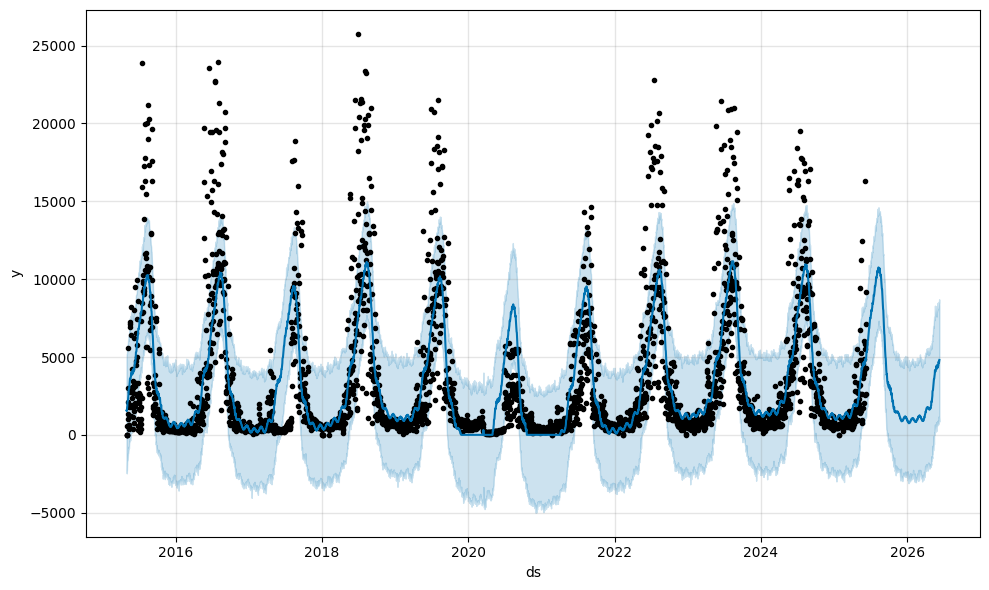

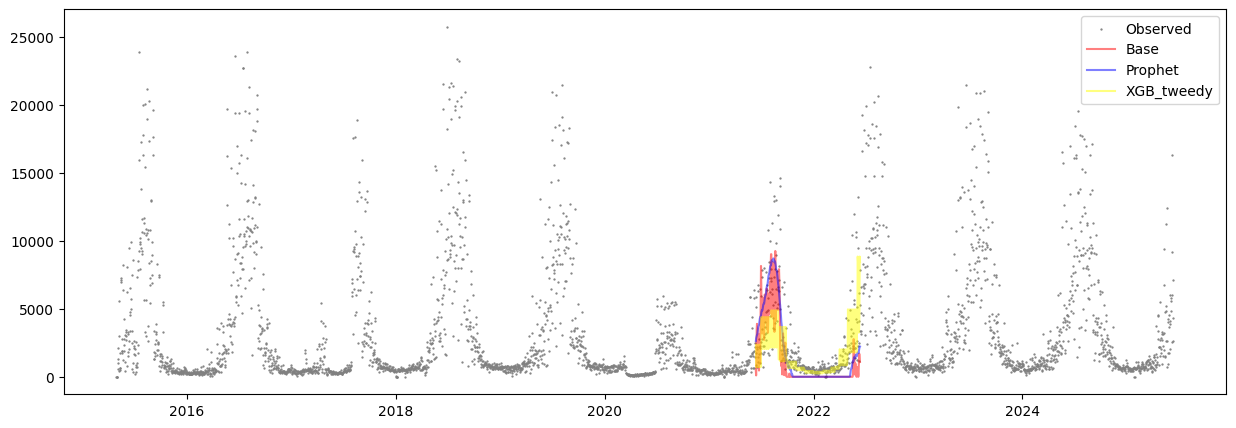

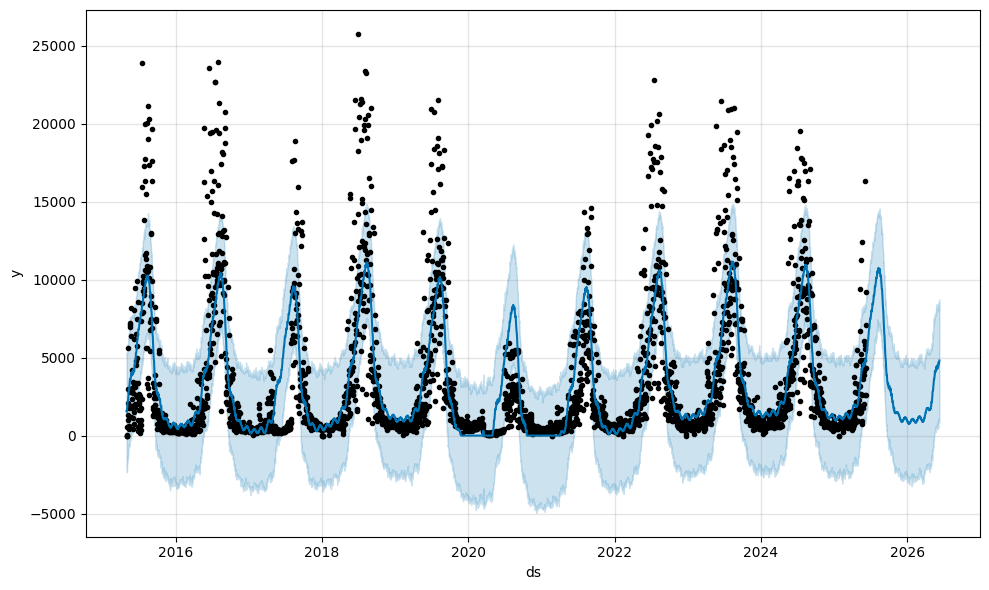

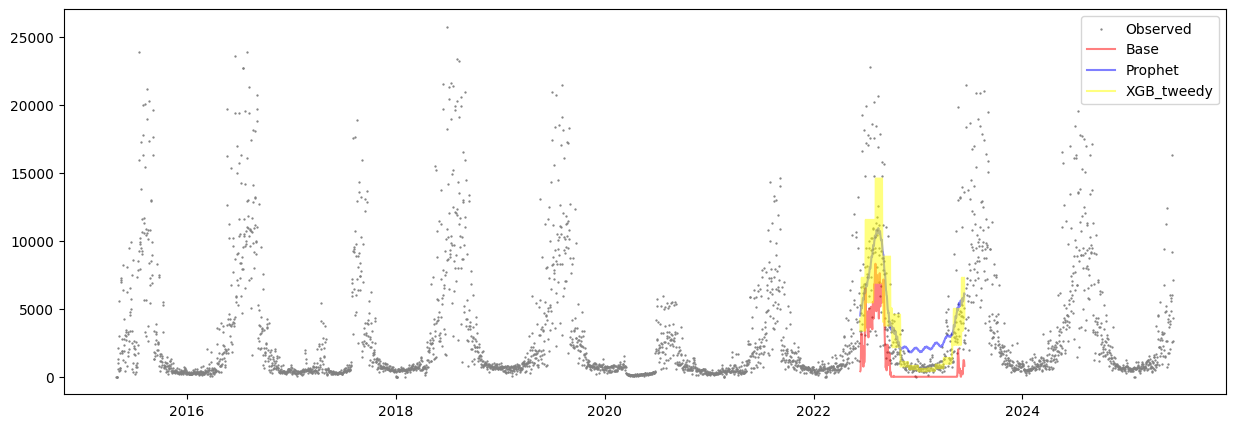

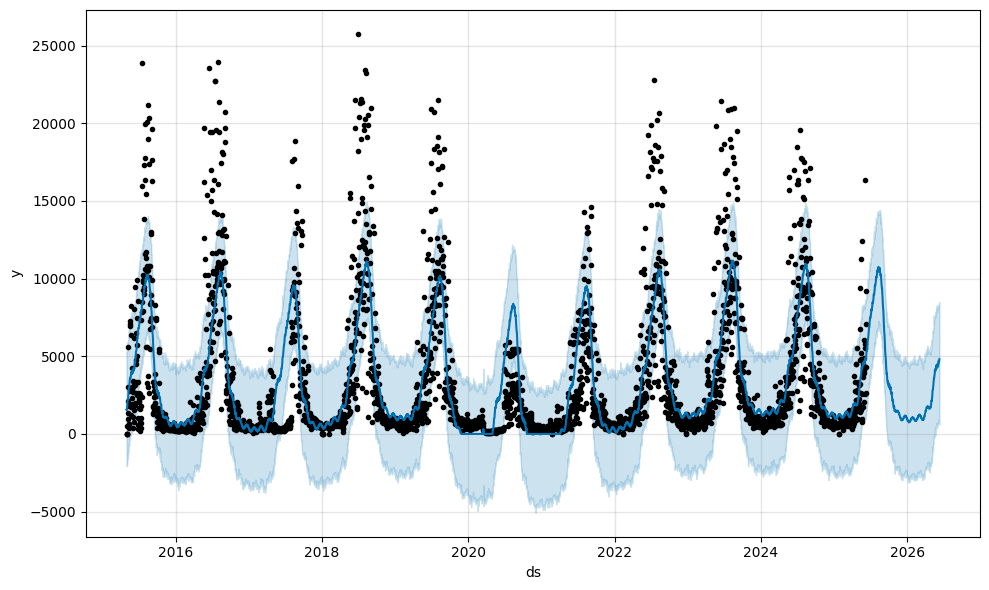

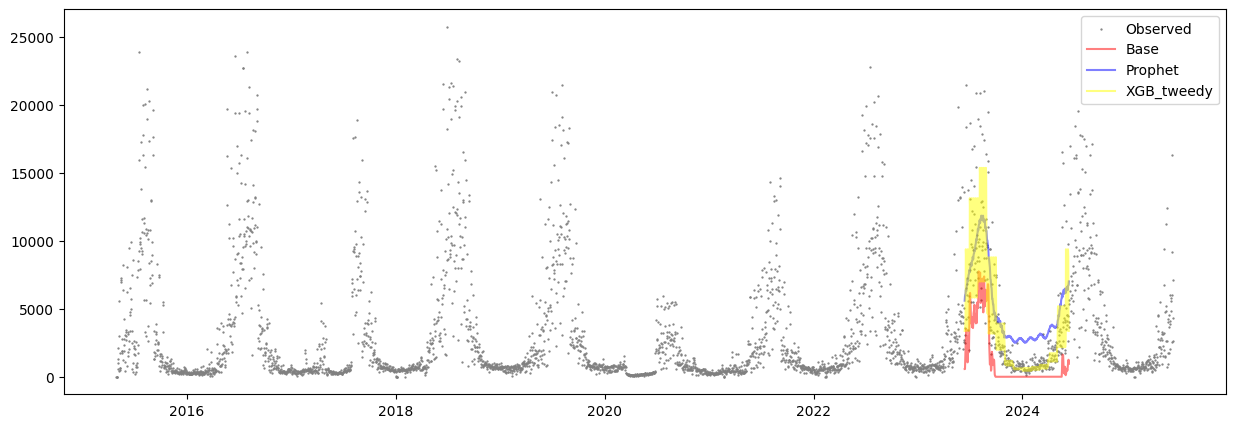

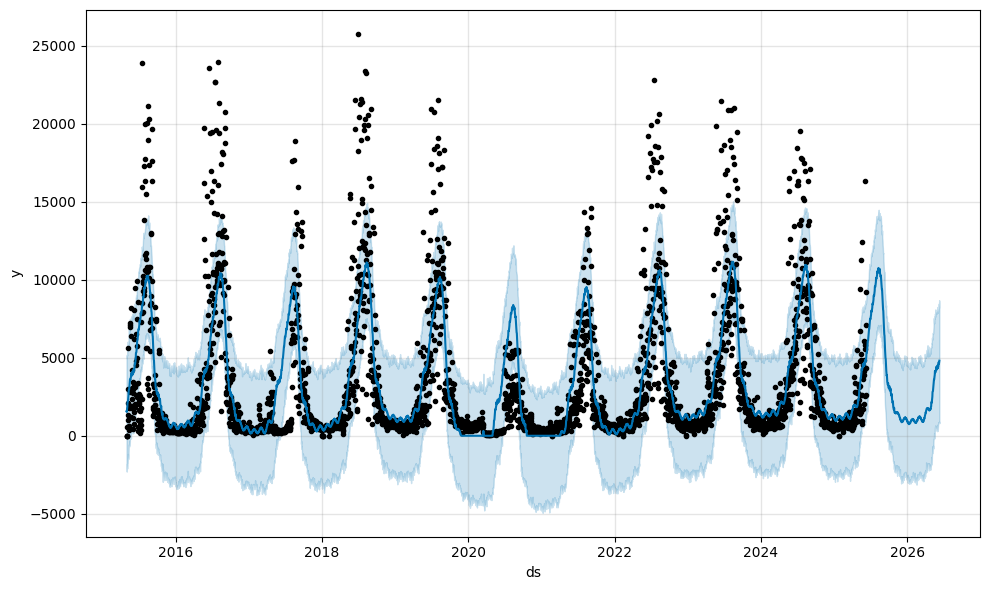

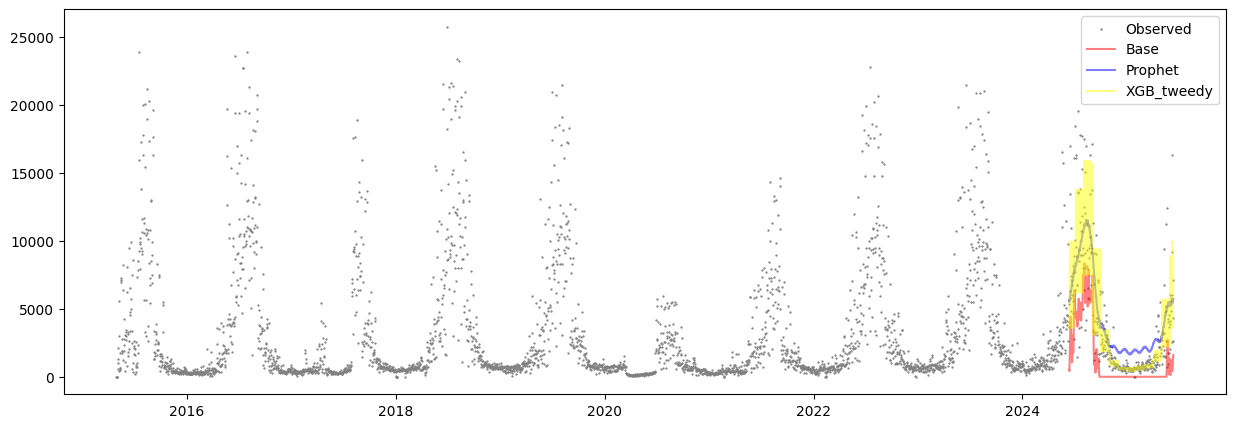

In [4]:
rm = RedemptionModel(df, 'Redemption Count')
rm.run_models()

In [ ]:
# Above there are two plots for  each subset of data - the model from Prophet fitted to the data as a whole (with confidence intervals)
# And the mean values (no confidence intervals) of 3 different methods trying to predict 'truth' data.

In [5]:
# print redemption model summary stats
rm.results

{'Base': {0: 0.8917838081113705,
  1: 0.8535856042944977,
  2: 0.8495029583241723,
  3: 0.8586875932801632},
 'Prophet': {0: 0.872058438712743,
  1: 2.6310218804979156e+16,
  2: 1.6701759941263679,
  3: 4.879813290738612e+16},
 'XGB_tweedy': {0: 9852077303922688.0,
  1: 1.000514779086848e+16,
  2: 0.34570685029029846,
  3: 1.5722768242835456e+16},
 'XGB_lognormal': {0: 135100276670464.0,
  1: 78095910436864.0,
  2: 0.9949261546134949,
  3: 149491739000832.0}}

14:07:00 - cmdstanpy - INFO - Chain [1] start processing
14:07:01 - cmdstanpy - INFO - Chain [1] done processing
14:07:01 - cmdstanpy - INFO - Chain [1] start processing
14:07:01 - cmdstanpy - INFO - Chain [1] done processing
14:07:04 - cmdstanpy - INFO - Chain [1] start processing
14:07:04 - cmdstanpy - INFO - Chain [1] done processing
14:07:05 - cmdstanpy - INFO - Chain [1] start processing
14:07:05 - cmdstanpy - INFO - Chain [1] done processing
14:07:07 - cmdstanpy - INFO - Chain [1] start processing
14:07:08 - cmdstanpy - INFO - Chain [1] done processing
14:07:08 - cmdstanpy - INFO - Chain [1] start processing
14:07:09 - cmdstanpy - INFO - Chain [1] done processing
14:07:11 - cmdstanpy - INFO - Chain [1] start processing
14:07:12 - cmdstanpy - INFO - Chain [1] done processing
14:07:12 - cmdstanpy - INFO - Chain [1] start processing
14:07:12 - cmdstanpy - INFO - Chain [1] done processing


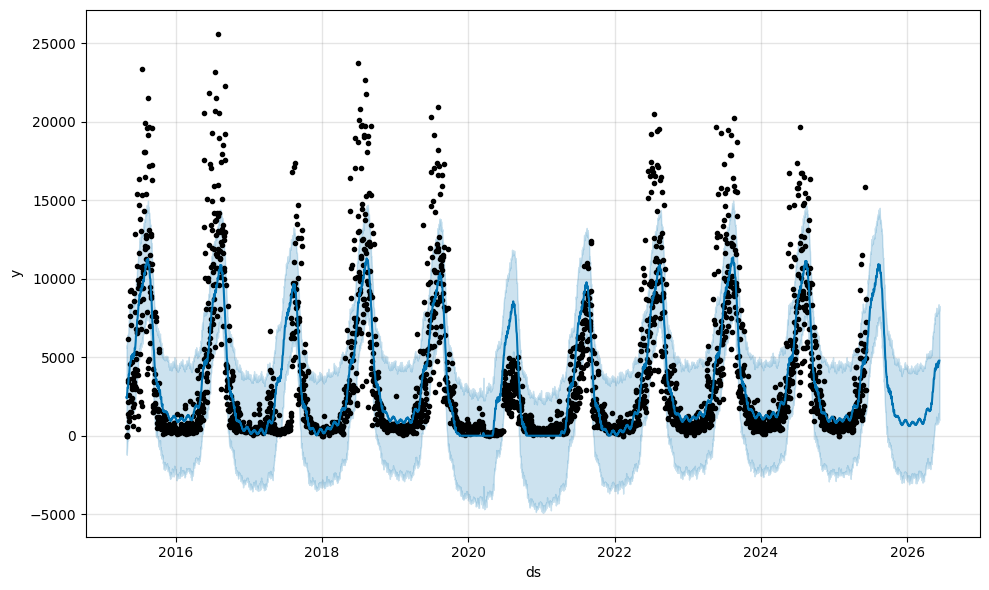

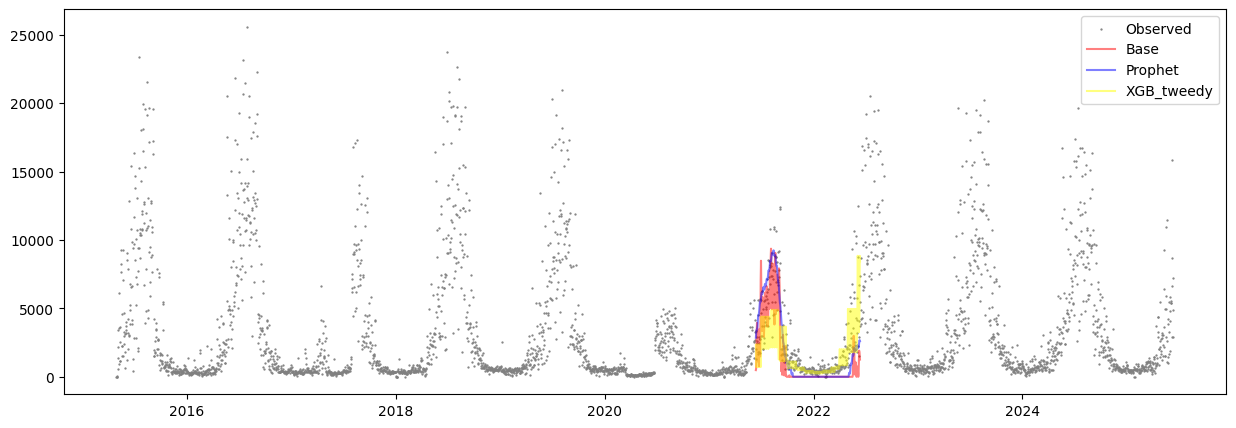

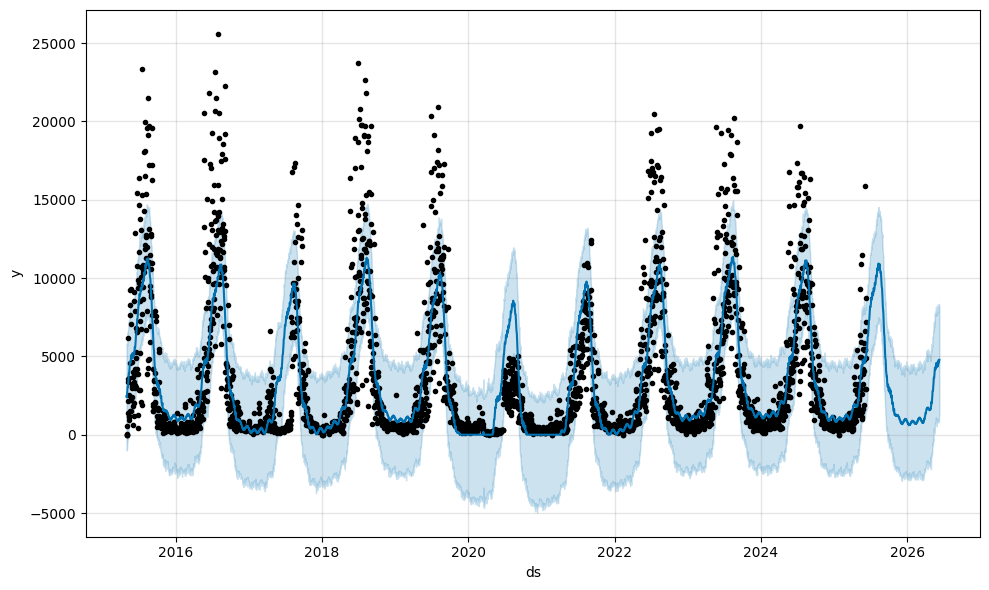

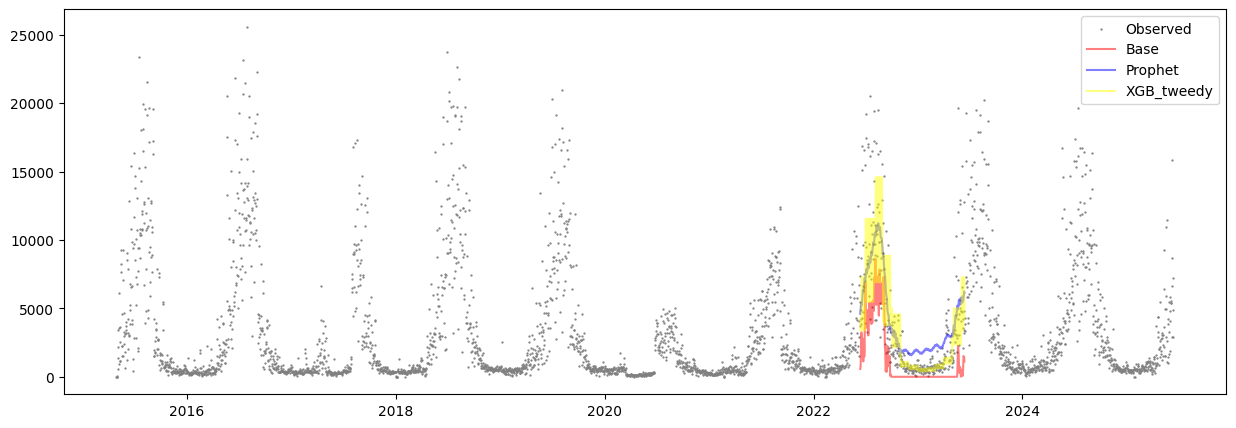

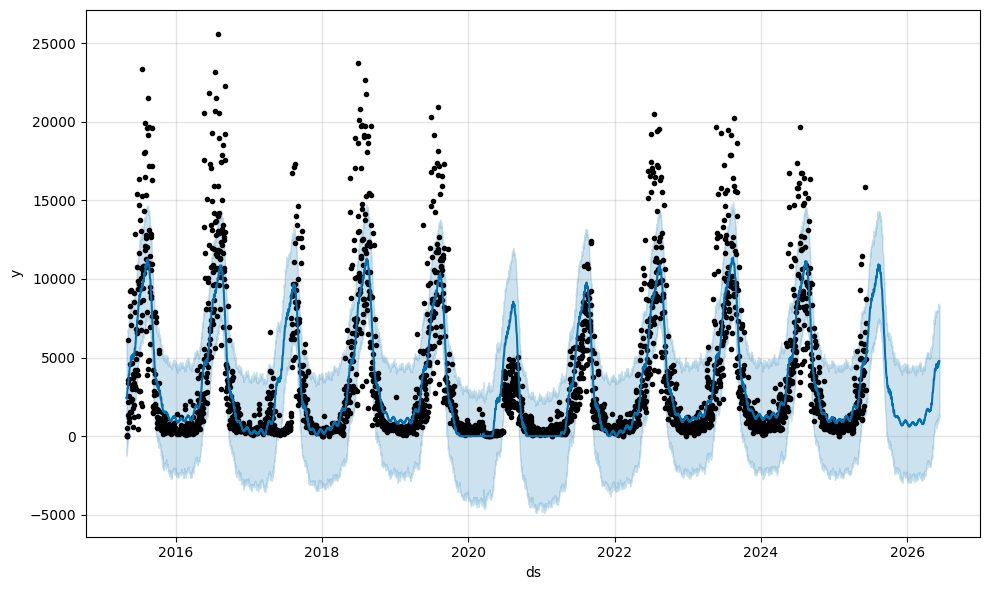

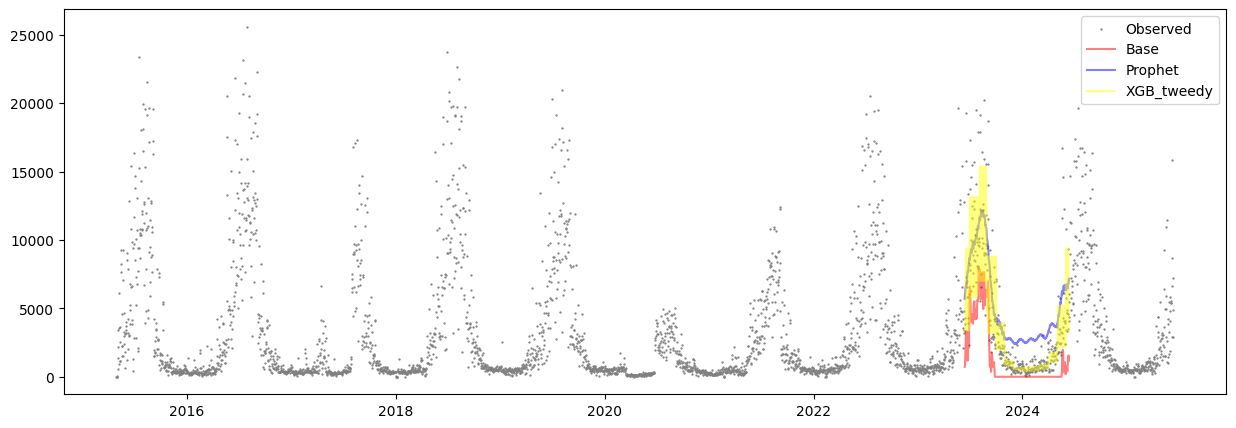

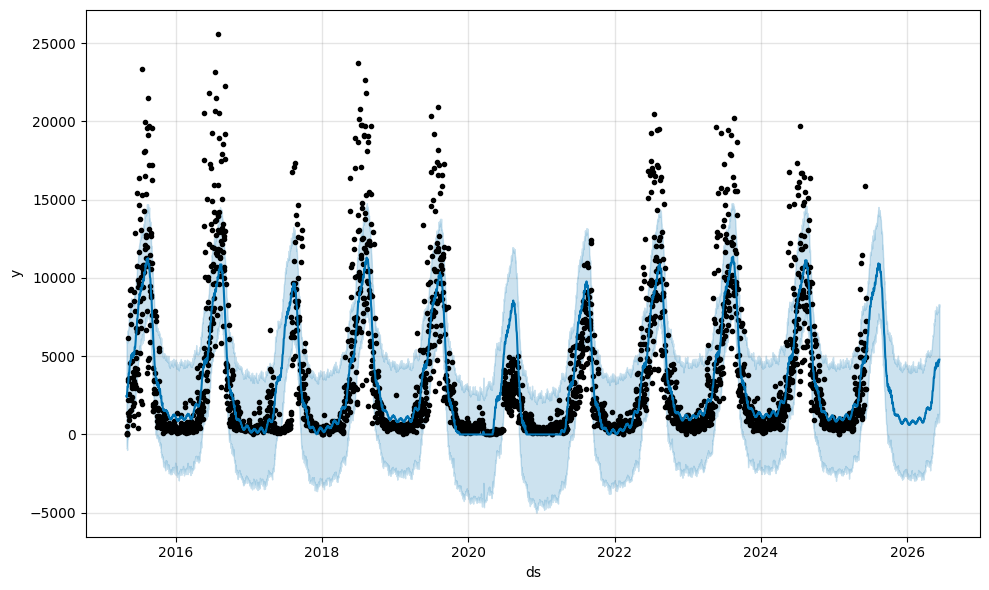

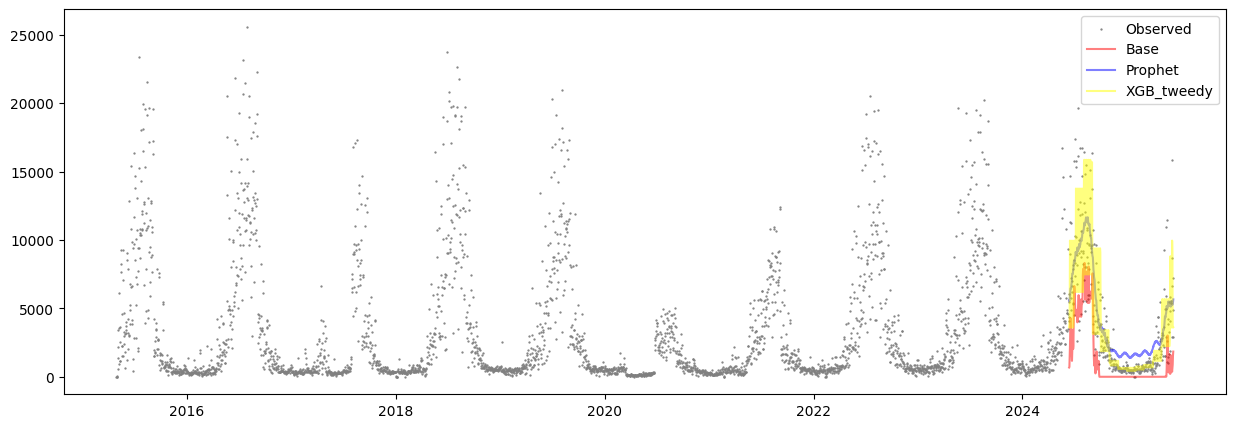

In [6]:
sales = RedemptionModel(df, 'Sales Count')
sales.run_models()

In [7]:
# print sales model summary stats
sales.results

{'Base': {0: 0.8187354200417079,
  1: 0.8527769763465236,
  2: 0.8490349780475327,
  3: 0.8454292421145831},
 'Prophet': {0: 0.78482820265591,
  1: 1.5538777646362747,
  2: 2.0198880883020687,
  3: 2.0943230223377404e+16},
 'XGB_tweedy': {0: 1.0801055431365967,
  1: 0.554029643535614,
  2: 0.4016076922416687,
  3: 8139730751324160.0},
 'XGB_lognormal': {0: 0.9926621317863464,
  1: 0.9933762550354004,
  2: 0.9939565062522888,
  3: 74318503477248.0}}